## Data Cleaning

In [9]:
import pygwalker as pyg
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


#### Helper Functions

In [98]:
def tabulate_table(data,col_names):
    print(tabulate(data,headers=col_names))

def outlier_range(attribute):
    Q1=attribute.quantile(0.25)
    Q3=attribute.quantile(0.75)
    IQR = Q3-Q1
    upper_fence = Q3+(1.5*IQR)
    return upper_fence

def gather_nominal_attributes(df):
    nominal_attributes = []
    for attribute in df:
        col = df[attribute]
        if type(col[0])==str :
            nominal_attributes.append([attribute,", ".join(df[attribute].unique())])
    tabulate_table(nominal_attributes,["Nominal Attributes","Values"])
    return nominal_attributes

def gather_other_attributes(df):
    real_int_attributes = []
    box_plot_data = []

    for attribute in df: # Gather attributes that are not nominal
        col = df[attribute]
        if type(col[0])!=str :
            real_int_attributes.append([attribute, df[attribute].dtype,min(df[attribute]),df[attribute].mean(),max(df[attribute]),df[attribute].std()])
            if df[attribute].std()>1 : # Gather data for boxplot
                box_plot_data.append([attribute,outlier_range(df[attribute])])

    real_int_attributes = np.array(real_int_attributes)
    box_plot_data=np.array(box_plot_data)
    
    tabulate_table(real_int_attributes,["Attribute","Data type","MIN","MEAN","MAX","STD"]) 

    return [real_int_attributes,box_plot_data]

#### Raw Data

In [2]:
data = pd.read_csv("ObesityDataSet.csv")
X = data.drop("NObeyesdad", axis=1)
Y = data["NObeyesdad"]

data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Nominal Attributes
These attributes will be encoded

In [95]:
nominal_attributes=gather_nominal_attributes(X)

Nominal Attributes              Values
------------------------------  -----------------------------------------------------------
Gender                          Female, Male
family_history_with_overweight  yes, no
FAVC                            no, yes
CAEC                            Sometimes, Frequently, Always, no
SMOKE                           no, yes
SCC                             no, yes
CALC                            no, Sometimes, Frequently, Always
MTRANS                          Public_Transportation, Walking, Automobile, Motorbike, Bike


#### Cleansing (Getting rid of noise) & Normalization

Attribute    Data type      MIN       MEAN     MAX         STD
-----------  -----------  -----  ---------  ------  ----------
Age          float64      14     24.3126     61      6.34597
Height       float64       1.45   1.70168     1.98   0.0933048
Weight       float64      39     86.5861    173     26.1912
FCVC         float64       1      2.41904     3      0.533927
NCP          float64       1      2.68563     4      0.778039
CH2O         float64       1      2.00801     3      0.612953
FAF          float64       0      1.0103      3      0.850592
TUE          float64       0      0.657866    2      0.608927


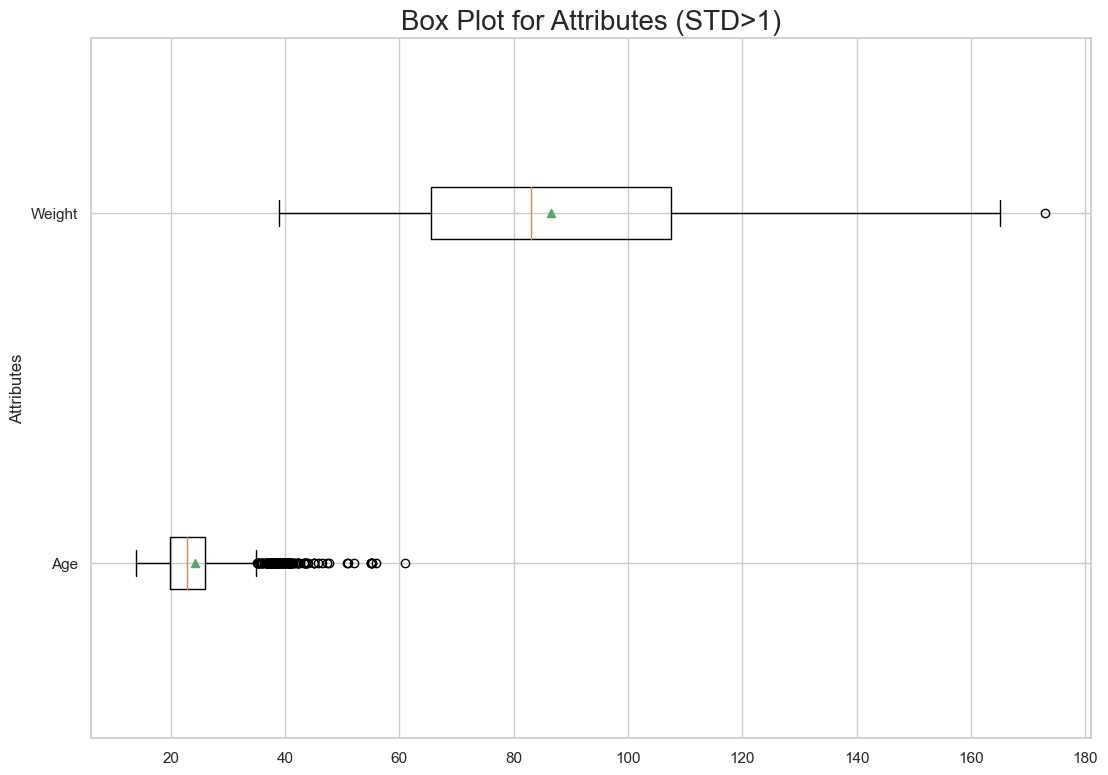

Attribute       Upper fence
-----------  --------------
Age                 35.0792
Weight             170.367


Data Without Noise
------------------


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [104]:

# Gather attributes that are not nominal
other_attributes_data= gather_other_attributes(X)
other_attributes,box_plot_data = other_attributes_data[0],other_attributes_data[1]

# Creating boxplot to identify outliers
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X[box_plot_data[:,0]],vert=False,showmeans=True)
ax.set_yticklabels(box_plot_data[:,0])
plt.ylabel("Attributes")
plt.title("Box Plot for Attributes (STD>1)",fontsize = 20)
plt.show()

tabulate_table(box_plot_data,["Attribute"," Upper fence"])

# Removing noise from data
print("\n\nData Without Noise\n------------------")
data_without_noise = data[(data["Age"]<math.trunc(float(box_plot_data[0][1]))) & (data["Weight"]<math.trunc(float(box_plot_data[1][1])))]
data_without_noise.to_csv("DataWithoutNoise.csv",index=False)
data_without_noise

#### Discretization

#### Class Attribute 

Class attribute values      Count
------------------------  -------
Obesity_Type_I                351
Obesity_Type_III              324
Obesity_Type_II               297
Overweight_Level_I            290
Overweight_Level_II           290
Normal_Weight                 287
Insufficient_Weight           272


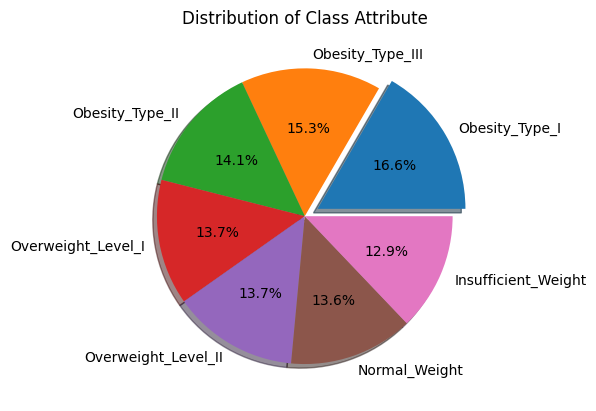

In [72]:
target_distribution = []
target_distribution_dict= Y.value_counts().to_dict()
target_values=list(target_distribution_dict.keys())
target_counts=list(target_distribution_dict.values())

for i in range(len(target_values)):
    target_distribution.append([target_values[i],target_counts[i]])
print(tabulate(target_distribution,headers = ["Class attribute values","Count"]))


# Creating plot
explode = (0.1, 0, 0,0,0,0,0) 
plt.pie(target_counts, labels = target_values,autopct='%1.1f%%',explode=explode, shadow=True)
plt.title("Distribution of Class Attribute")
plt.show()

Since the class attribute values are evenly distributed, the gini index can be used as measure of attribute selection.

#### Encoding

In [ ]:
data = pd.read_csv("ObesityDataSet.csv")

gender = ["Female", "Male"]
frequency = ["no", "Sometimes", "Frequently", "Always"]
decision = ["no", "yes"]
transport = ["Walking", "Bike", "Motorbike", "Public_Transportation", "Automobile"]
labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"],
oe_map = {
    "name": "oe",
    "features": ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "CAEC", "CALC", "MTRANS"],
    "categories": [gender, decision, decision, decision, decision, frequency, frequency, transport]
}

oe = OrdinalEncoder(categories=oe_map["categories"])
ct = ColumnTransformer(
    transformers=[
        ("oe", oe, oe_map["features"])
    ], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

data = ct.fit_transform(data).reindex(data.columns, axis=1)

le = LabelEncoder()
le.fit(np.array(labels).reshape(-1, 1).ravel())
data["NObeyesdad"] = le.transform(data["NObeyesdad"])

X = data.drop("NObeyesdad", axis=1)
Y = data["NObeyesdad"]

data.to_csv("DataEncoded.csv",index=False)

#### Decode

In [ ]:
def column_inverse_transform(data, transformer, map):
    if pd.Series(map["features"]).isin(data.columns).all():
        data[map["features"]] = transformer.named_transformers_[
            map["name"]].inverse_transform(data[map["features"]])
    return data


def label_inverse_transform(data, le):
    if type(data) == pd.Series:
        return le.inverse_transform(data)
    if "NObeyesdad" in data.columns:
        data["NObeyesdad"] = le.inverse_transform(data["NObeyesdad"])
    return data


data = column_inverse_transform(data, ct, oe_map)
data["NObeyesdad"] = label_inverse_transform(data["NObeyesdad"], le)
data


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
